In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import csv
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier, LinearRegression
import seaborn as sns
from random import seed
import matplotlib.pyplot as plt
from random import randint

#MultiClass Calassification

##50 Agree

In [ ]:
#load train e test
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_50Agree.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt'
delimiter = ','

In [ ]:
#train / test split
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(4264, 4264, 1454, 1454)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count, CountVectorizer 
                                  # converts a collection of text documents to a matrix of token counts
print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((1454, 1847), (4264, 1847))

In [ ]:
# feature selection, SelectKBest selects features according to the k highest scores
sel = SelectKBest(chi2, k='all')  
sel.fit(X_train_tok,y_train)
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
# weighting, TfidfTransformer() transforms a count matrix to a normalized tf or tf-idf representation
tfidf = TfidfTransformer()  
tfidf.fit(X_train_sel)
X_train_vec = tfidf.transform(X_train_sel)
X_test_vec =tfidf.transform(X_test_sel)

In [ ]:
%%time
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_vec, y_train)
y_pred = lr.predict(X_test_vec)
print(accuracy_score(y_test,y_pred)*100)

74.82806052269602
CPU times: user 240 ms, sys: 0 ns, total: 240 ms
Wall time: 247 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.35      0.49       179
     neutral       0.73      0.99      0.84       872
    positive       0.82      0.41      0.54       403

    accuracy                           0.75      1454
   macro avg       0.80      0.58      0.62      1454
weighted avg       0.77      0.75      0.71      1454



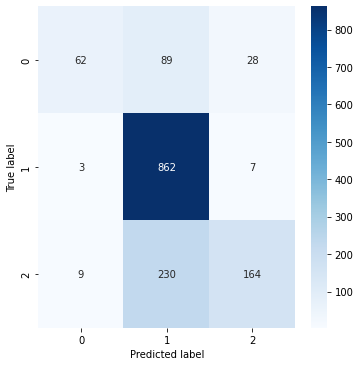

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

memorandum understanding mou party collaborate preparing implementing joint project field combined power heat generation environmental protection energy efficient technology
Label: positive
Predicted Label:  ['neutral']


In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

finnish electronics manufacturing service company elcoteq signing cooperation agreement japanese mobile phone manufacturer bypass elcoteq tallinn say jan kotka ceo elcoteq tallinn
Label: positive
Predicted Label:  ['positive']


##66 Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_66Agree.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(3723, 3723, 1454, 1454)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((1454, 1688), (3723, 1688))

In [ ]:
sel = SelectKBest(chi2, k='all')  # feature selection
sel.fit(X_train_tok,y_train)
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel)
X_train_vec = tfidf.transform(X_train_sel)
X_test_vec =tfidf.transform(X_test_sel)

In [ ]:
%%time
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_vec, y_train)
y_pred = lr.predict(X_test_vec)
print(accuracy_score(y_test,y_pred)*100)

74.14030261348006
CPU times: user 284 ms, sys: 4.81 ms, total: 289 ms
Wall time: 323 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.31      0.44       179
     neutral       0.73      0.98      0.84       872
    positive       0.78      0.42      0.55       403

    accuracy                           0.74      1454
   macro avg       0.77      0.57      0.61      1454
weighted avg       0.75      0.74      0.71      1454



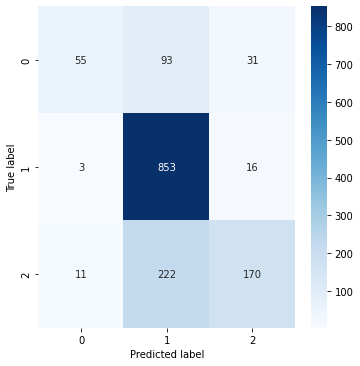

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet

from random import seed
from random import randint

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

amer sport divests industrial site rumilly france announcement distributed thomson reuters behalf thomson reuters client
Label: neutral
Predicted Label:  ['neutral']


In [ ]:
#sentiment prediction on random tweet

from random import seed
from random import randint

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

tecnomen headquartered espoo finland develops messaging charging solution telecomms operator service provider worldwide
Label: neutral
Predicted Label:  ['neutral']


##75 Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_75Agree.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(3061, 3061, 1454, 1454)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((1454, 1407), (3061, 1407))

In [ ]:
sel = SelectKBest(chi2, k='all')  # feature selection
sel.fit(X_train_tok,y_train)
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel)
X_train_vec = tfidf.transform(X_train_sel)
X_test_vec =tfidf.transform(X_test_sel)

In [ ]:
%%time
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_vec, y_train)
y_pred = lr.predict(X_test_vec)
print(accuracy_score(y_test,y_pred)*100)

72.76478679504814
CPU times: user 286 ms, sys: 378 µs, total: 286 ms
Wall time: 304 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.81      0.29      0.43       179
     neutral       0.72      0.98      0.83       872
    positive       0.75      0.37      0.50       403

    accuracy                           0.73      1454
   macro avg       0.76      0.55      0.59      1454
weighted avg       0.74      0.73      0.69      1454



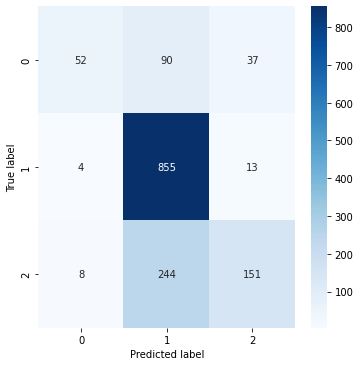

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet

from random import seed
from random import randint

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

company moved operating profit eur10 9 versus operating loss eur15 3 also turned eps eur0 08 versus loss per share eur0 04
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet

from random import seed
from random import randint

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

new agreement continuation theagreement signed earlier year lemminkainen group whereby cramo acquired entire construction machine fleet oflemminkainen talo oy ita ja pohjois suomo signed asimilar agreement said tatu hauhio managing director ofcramo finland
Label: neutral
Predicted Label:  ['positive']


##All Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_AllAgree.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt'
delimiter = ','

In [ ]:
import csv
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(2008, 2008, 1454, 1454)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((1454, 959), (2008, 959))

In [ ]:
sel = SelectKBest(chi2, k='all')  # feature selection
sel.fit(X_train_tok,y_train)
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel)
X_train_vec = tfidf.transform(X_train_sel)
X_test_vec =tfidf.transform(X_test_sel)

In [ ]:
%%time
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_vec, y_train)
y_pred = lr.predict(X_test_vec)
print(accuracy_score(y_test,y_pred)*100)

70.90784044016506
CPU times: user 184 ms, sys: 1.43 ms, total: 185 ms
Wall time: 247 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.28      0.42       179
     neutral       0.70      0.97      0.82       872
    positive       0.71      0.33      0.45       403

    accuracy                           0.71      1454
   macro avg       0.75      0.53      0.56      1454
weighted avg       0.72      0.71      0.67      1454



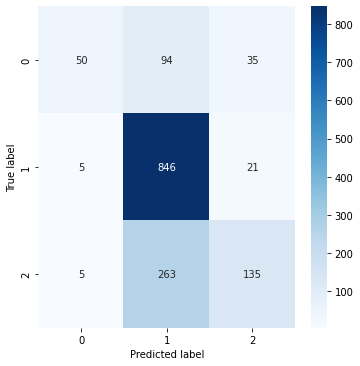

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet

from random import seed
from random import randint

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

adp news nov 18 2008 finnish ac drive manufacturer vacon oyj omx vac1v said today set new representative office romania ukraine serve growing market eastern southeastern europe
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet

from random import seed
from random import randint

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

extension new contract eight engine plant produce 100 mw said
Label: positive
Predicted Label:  ['neutral']


#Binary Classification

##50 Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_50Agree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
import csv
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((582, 741), (1385, 741))

In [ ]:
bin_sel = SelectKBest(chi2, k='all')  # feature selection
bin_sel.fit(X_train_tok,y_train)
X_train_sel_bin = bin_sel.transform(X_train_tok)
X_test_sel_bin = bin_sel.transform(X_test_tok)

In [ ]:
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel_bin)
X_train_vec_bin = tfidf.transform(X_train_sel_bin)
X_test_vec_bin =tfidf.transform(X_test_sel_bin)

In [ ]:
%%time
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_vec_bin, y_train)
y_pred = lr.predict(X_test_vec_bin)
print(accuracy_score(y_test,y_pred)*100)

81.09965635738831
CPU times: user 42.2 ms, sys: 883 µs, total: 43.1 ms
Wall time: 51.1 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.88      0.45      0.59       179
    positive       0.80      0.97      0.88       403

    accuracy                           0.81       582
   macro avg       0.84      0.71      0.73       582
weighted avg       0.82      0.81      0.79       582



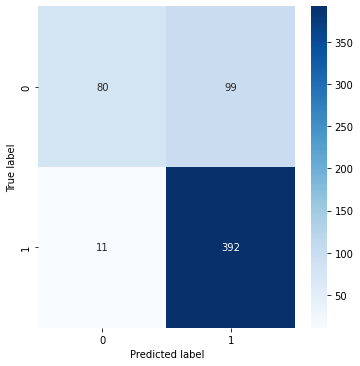

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet

from random import seed
from random import randint

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

press conference lattelecom board chairman nil melngailis explained blackstone chosen experience sector well financial strength
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet

from random import seed
from random import randint

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

consolidated net sale increased 16 reach eur74 8 operating profit amounted eur0 9 compared loss eur0 7 prior year period
Label: positive
Predicted Label:  ['positive']


##66 Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_66Agree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((582, 627), (1189, 627))

In [ ]:
bin_sel = SelectKBest(chi2, k='all')  # feature selection
bin_sel.fit(X_train_tok,y_train)
X_train_sel_bin = bin_sel.transform(X_train_tok)
X_test_sel_bin = bin_sel.transform(X_test_tok)

In [ ]:
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel_bin)
X_train_vec_bin = tfidf.transform(X_train_sel_bin)
X_test_vec_bin =tfidf.transform(X_test_sel_bin)

In [ ]:
%%time
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_vec_bin, y_train)
y_pred = lr.predict(X_test_vec_bin)
print(accuracy_score(y_test,y_pred)*100)

81.95876288659794
CPU times: user 105 ms, sys: 0 ns, total: 105 ms
Wall time: 139 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.50      0.63       179
    positive       0.81      0.96      0.88       403

    accuracy                           0.82       582
   macro avg       0.83      0.73      0.75       582
weighted avg       0.83      0.82      0.80       582



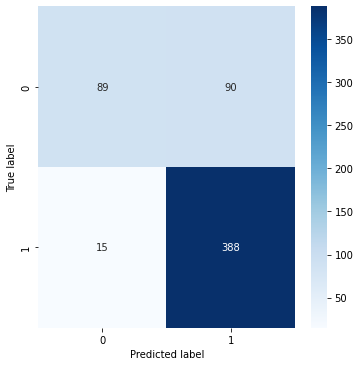

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

sony ericsson nokia dominated list bestselling handset five model
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

contract signed acquire uranium produced sotkamo nickelzinc mine eastern finland owned talvivaara
Label: positive
Predicted Label:  ['positive']


##75 Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_75Agree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((582, 477), (916, 477))

In [ ]:
bin_sel = SelectKBest(chi2, k='all')  # feature selection
bin_sel.fit(X_train_tok,y_train)
X_train_sel_bin = bin_sel.transform(X_train_tok)
X_test_sel_bin = bin_sel.transform(X_test_tok)

In [ ]:
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel_bin)
X_train_vec_bin = tfidf.transform(X_train_sel_bin)
X_test_vec_bin =tfidf.transform(X_test_sel_bin)

In [ ]:
%%time
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_vec_bin, y_train)
y_pred = lr.predict(X_test_vec_bin)
print(accuracy_score(y_test,y_pred)*100)

80.9278350515464
CPU times: user 84.7 ms, sys: 0 ns, total: 84.7 ms
Wall time: 111 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.45      0.59       179
    positive       0.80      0.97      0.88       403

    accuracy                           0.81       582
   macro avg       0.83      0.71      0.73       582
weighted avg       0.82      0.81      0.79       582



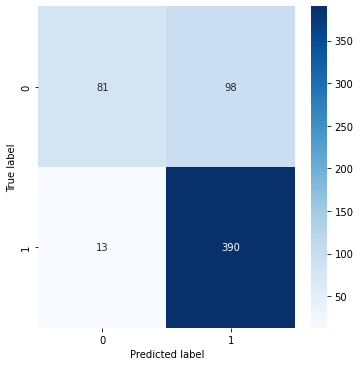

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet

from random import seed
from random import randint

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

revenue quarter totaled 274 billion 2 percent 281 billion fourth quarter 2008
Label: negative
Predicted Label:  ['negative']


In [ ]:
#sentiment prediction on random tweet

from random import seed
from random import randint

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

nokian tyre prof high safety excellently important driving quality stability mark 14 handling 15 braking wet road 19
Label: positive
Predicted Label:  ['positive']


##All Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_AllAgree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((582, 298), (618, 298))

In [ ]:
bin_sel = SelectKBest(chi2, k='all')  # feature selection
bin_sel.fit(X_train_tok,y_train)
X_train_sel_bin = bin_sel.transform(X_train_tok)
X_test_sel_bin = bin_sel.transform(X_test_tok)

In [ ]:
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel_bin)
X_train_vec_bin = tfidf.transform(X_train_sel_bin)
X_test_vec_bin =tfidf.transform(X_test_sel_bin)

In [ ]:
%%time
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_vec_bin, y_train)
y_pred = lr.predict(X_test_vec_bin)
print(accuracy_score(y_test,y_pred)*100)

79.38144329896907
CPU times: user 65.4 ms, sys: 793 µs, total: 66.2 ms
Wall time: 90.4 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.41      0.55       179
    positive       0.79      0.97      0.87       403

    accuracy                           0.79       582
   macro avg       0.81      0.69      0.71       582
weighted avg       0.80      0.79      0.77       582



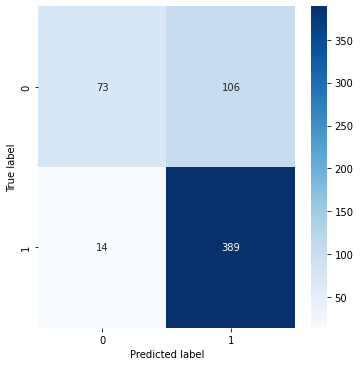

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet

from random import seed
from random import randint

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

earnings per share eps first half 2007 amounted eur0 29 eur0 40 year ago
Label: negative
Predicted Label:  ['negative']


In [ ]:
#sentiment prediction on random tweet

from random import seed
from random import randint

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",lr.predict(vect.transform([instance])))

hobby hall sale decrease 26 pct due implementing new information system involved changing principal posting sale
Label: negative
Predicted Label:  ['negative']
